*****(A)*****

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

file_path = 'Electricity BILL.csv'  # Replace with the correct path
data = pd.read_csv(file_path)

# Check for missing or invalid values and clean the data
data = data.apply(pd.to_numeric, errors='ignore')  
data = data.fillna(method='ffill')  

# Split the dataset into 80:20 ratio (train: test)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Normalize the numeric features
scaler = StandardScaler()
numeric_columns = train_data.select_dtypes(include=np.number).columns

# Apply scaling to train and test data separately
train_data[numeric_columns] = scaler.fit_transform(train_data[numeric_columns])
test_data[numeric_columns] = scaler.transform(test_data[numeric_columns])



C:\Users\amank\AppData\Local\Temp\ipykernel_2996\2882636919.py:14: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')
C:\Users\amank\AppData\Local\Temp\ipykernel_2996\2882636919.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


<Figure size 1200x800 with 0 Axes>

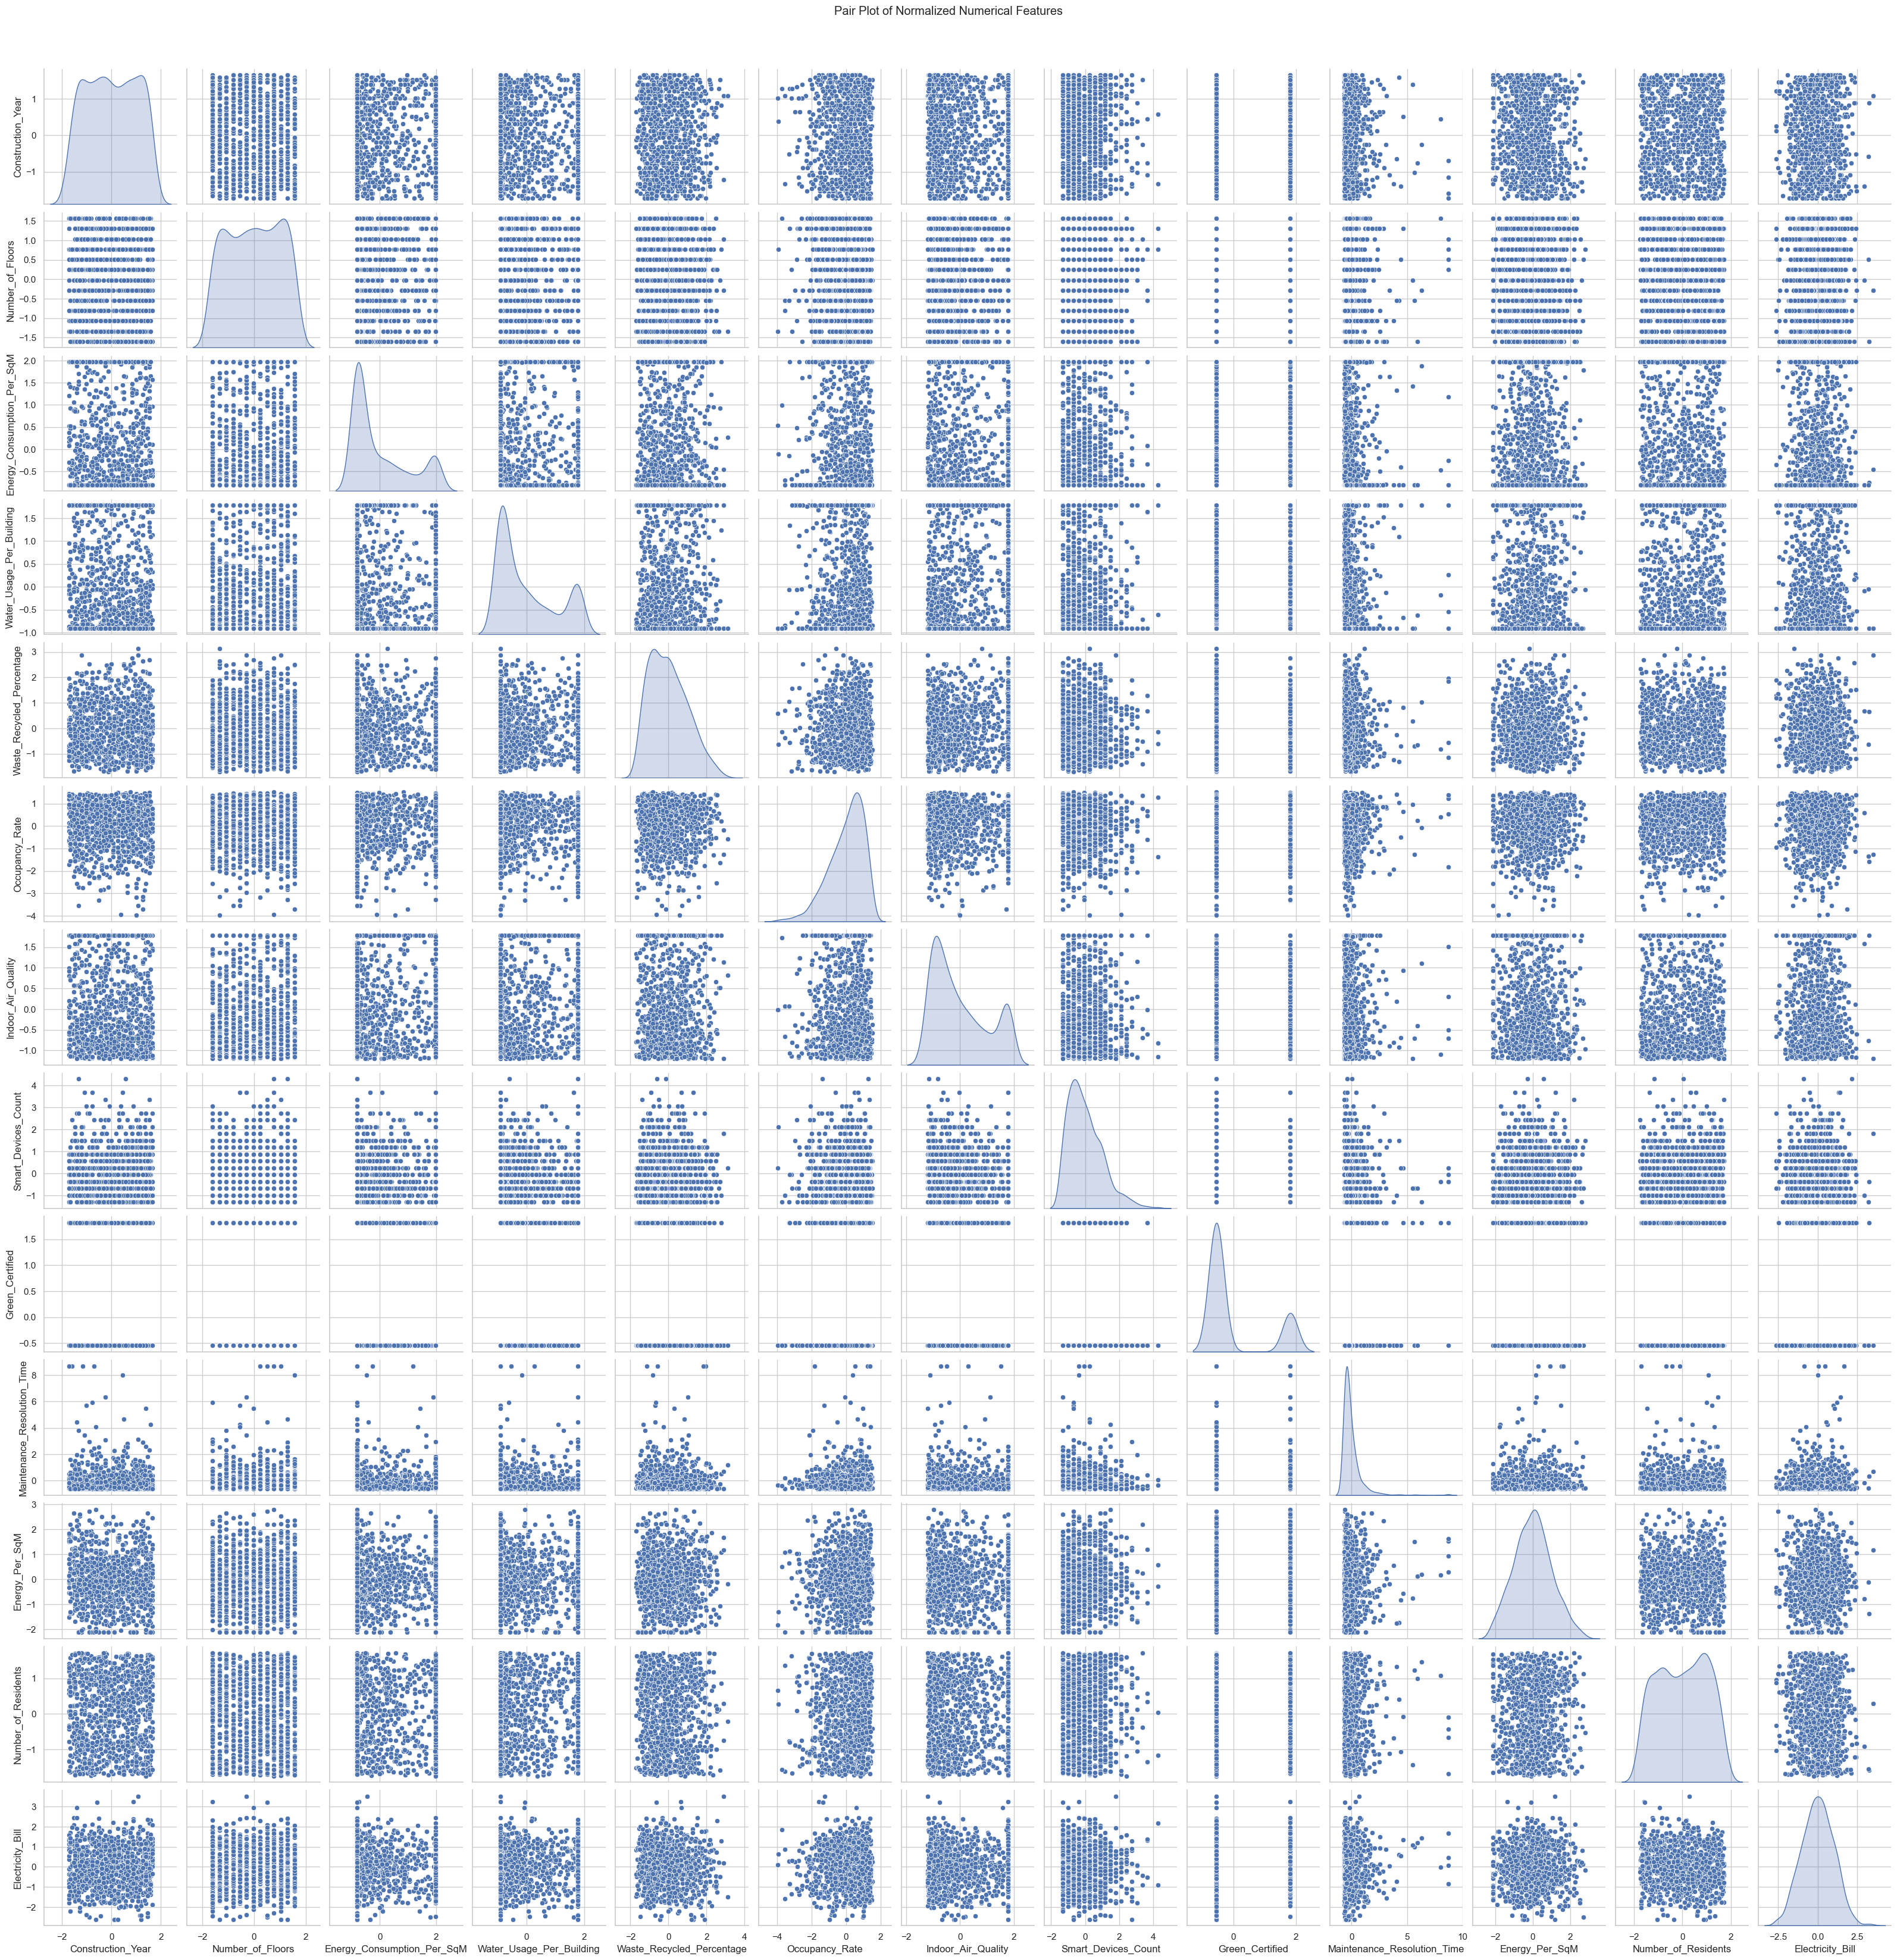

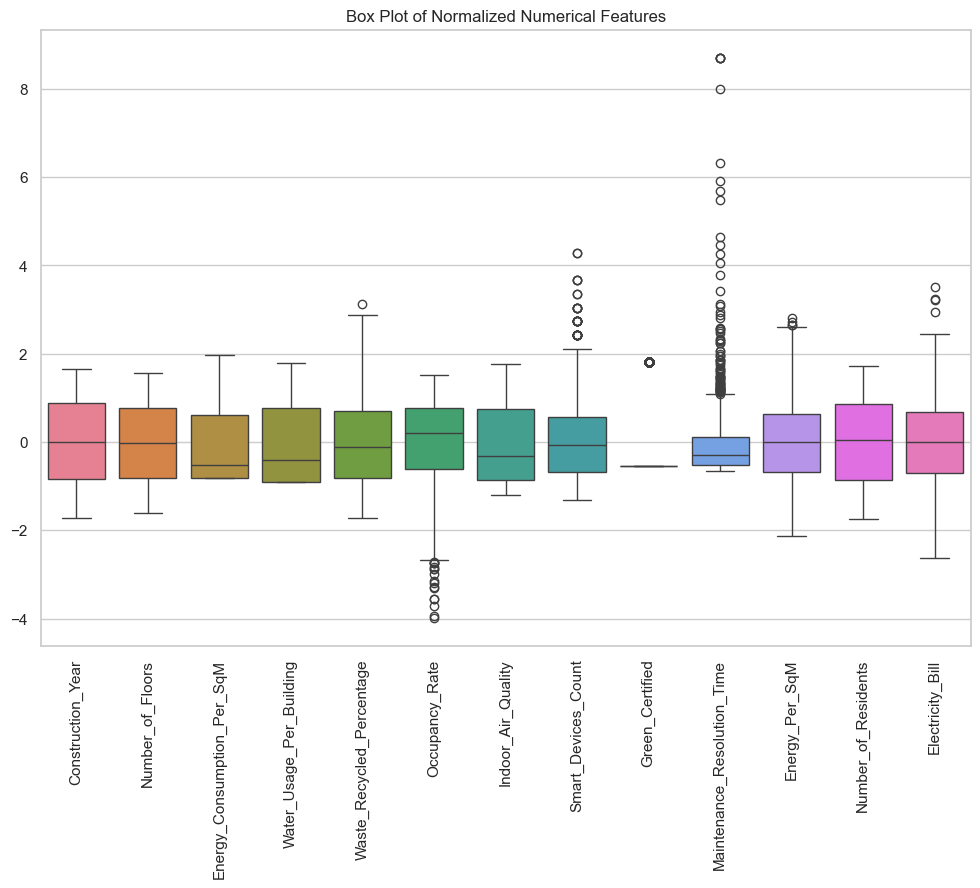

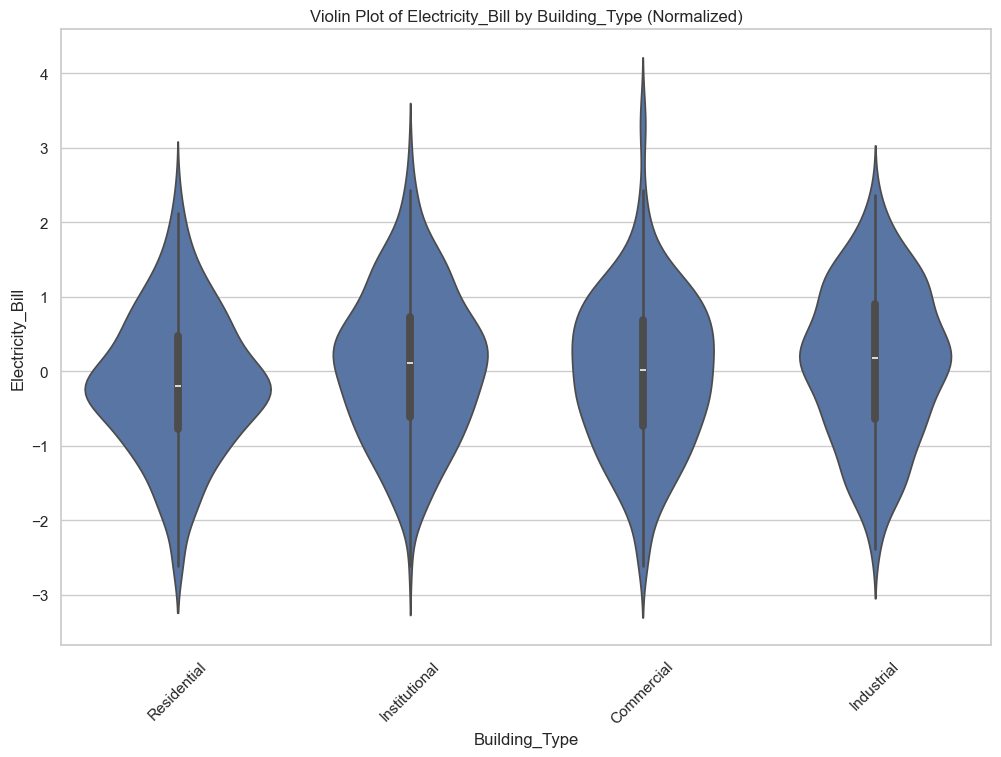

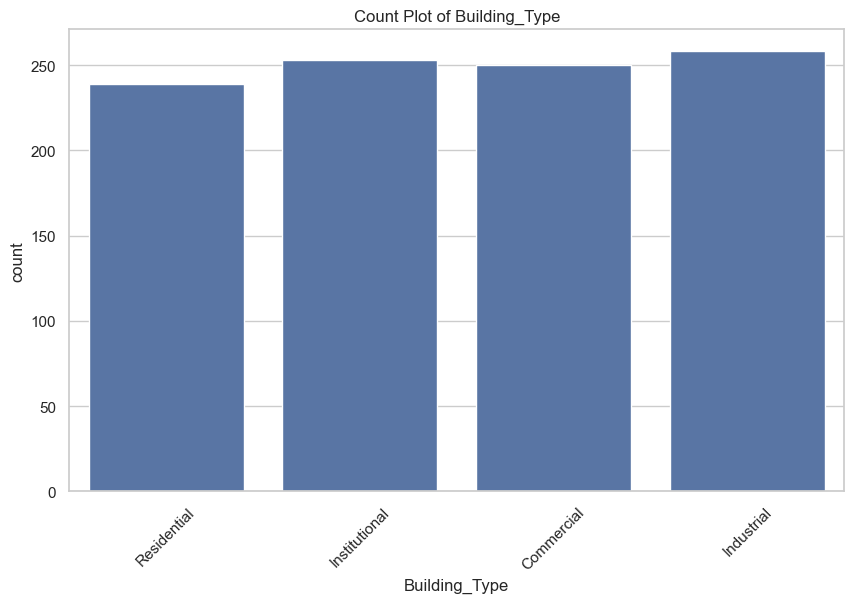

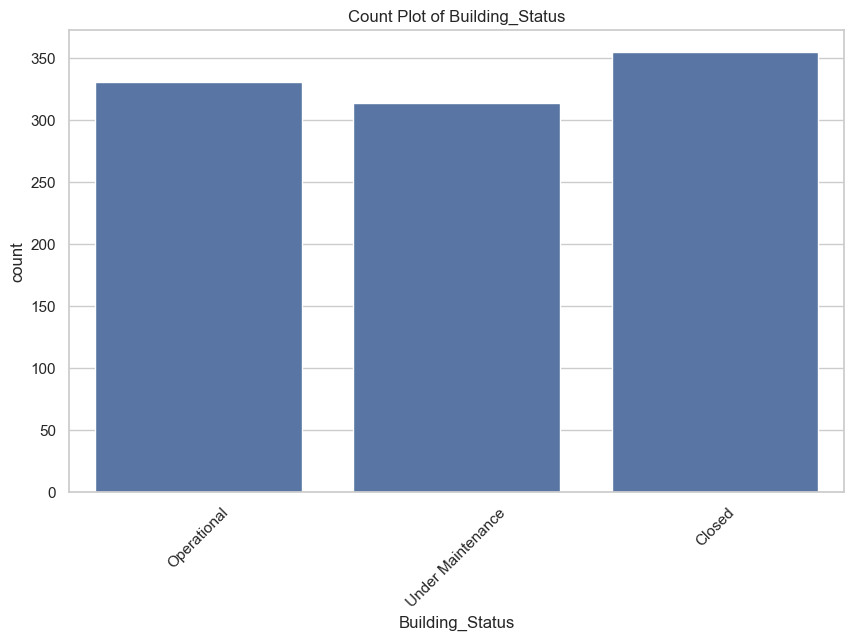

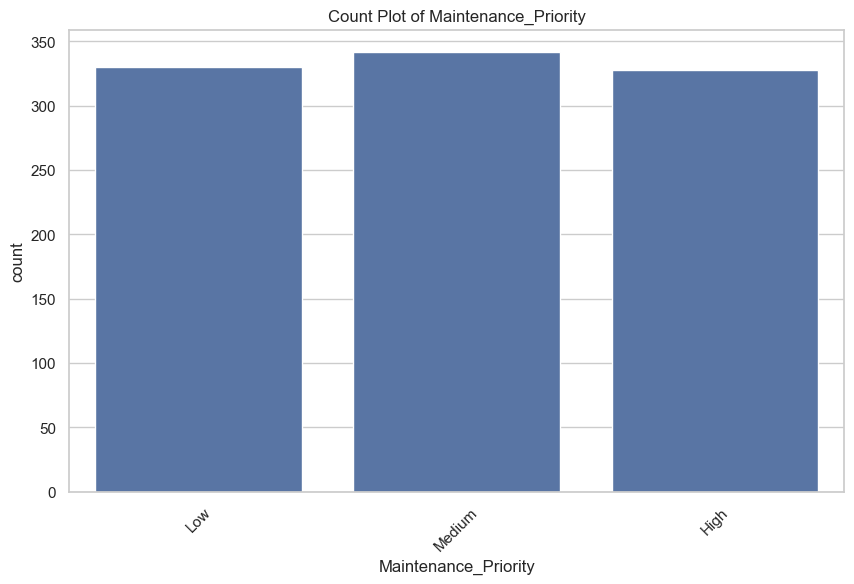

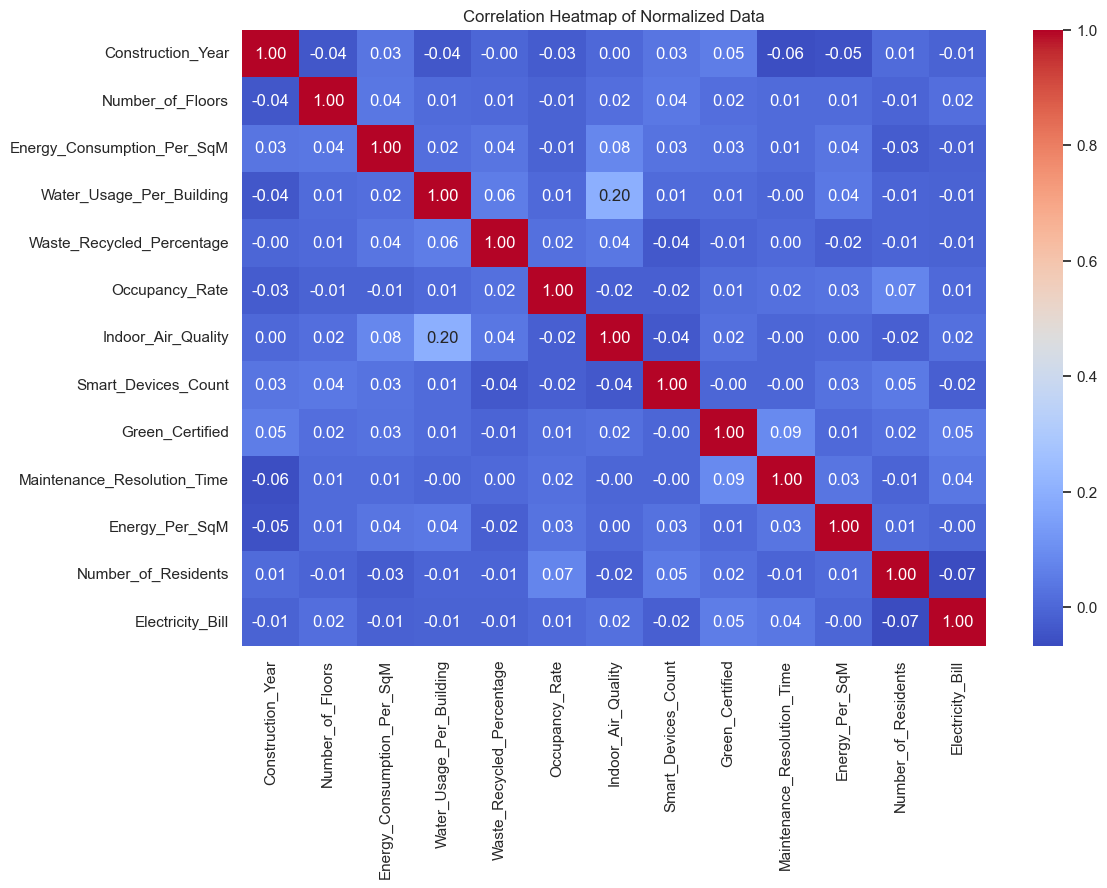

In [30]:
# Set the aesthetic style for Seaborn plots
def set_plot_style():
    sns.set(style="whitegrid")

# Function to create pair plot for numerical features
def plot_pairplot(train_data):
    plt.figure(figsize=(12, 8))
    sns.pairplot(train_data.select_dtypes(include=np.number), diag_kind='kde')
    plt.suptitle('Pair Plot of Normalized Numerical Features', y=1.02)
    plt.show()

# Function to create box plot for numerical features
def plot_boxplot(train_data):
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=train_data.select_dtypes(include=np.number))
    plt.title('Box Plot of Normalized Numerical Features')
    plt.xticks(rotation=90)
    plt.show()

# Function to create violin plot for a numerical feature against a categorical feature
def plot_violinplot(train_data, x_feature, y_feature):
    plt.figure(figsize=(12, 8))
    sns.violinplot(x=x_feature, y=y_feature, data=train_data)
    plt.title(f'Violin Plot of {y_feature} by {x_feature} (Normalized)')
    plt.xticks(rotation=45)
    plt.show()

# Function to create count plot for a categorical feature
def plot_countplot(train_data, categorical_feature):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=categorical_feature, data=train_data)
    plt.title(f'Count Plot of {categorical_feature}')
    plt.xticks(rotation=45)
    plt.show()

# Function to create a correlation heatmap for numerical features
def plot_correlation_heatmap(train_data):
    plt.figure(figsize=(12, 8))
    corr_matrix = train_data.select_dtypes(include=np.number).corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Normalized Data')
    plt.show()

# Function calls (assuming 'train_data' is your dataset)
set_plot_style()
plot_pairplot(train_data)
plot_boxplot(train_data)
plot_violinplot(train_data, x_feature="Building_Type", y_feature="Electricity_Bill")
plot_countplot(train_data, categorical_feature="Building_Type")
plot_countplot(train_data, categorical_feature="Building_Status")
plot_countplot(train_data, categorical_feature="Maintenance_Priority")
plot_correlation_heatmap(train_data)

***(B)***

C:\Users\amank\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


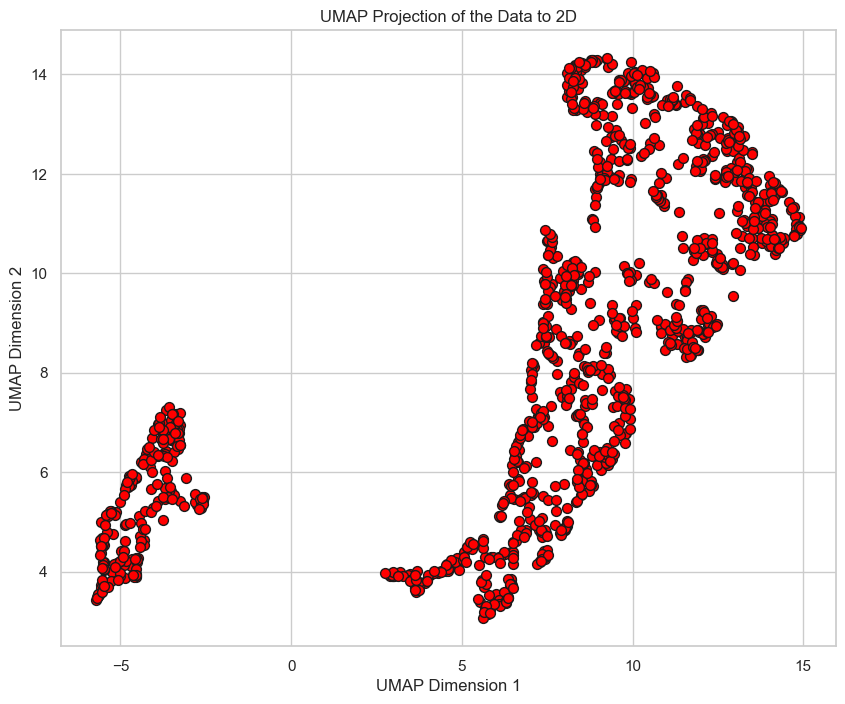

In [38]:
import umap
import matplotlib.pyplot as plt

# Function to apply UMAP dimensionality reduction
def apply_umap(data, numeric_columns, n_components=2, random_state=42):
    umap_reducer = umap.UMAP(n_components=n_components, random_state=random_state)
    data_2d = umap_reducer.fit_transform(data[numeric_columns])
    return data_2d

# Function to create a scatter plot for UMAP 2D data
def plot_umap_scatter(data_2d, color='red', edgecolor='k', size=50):
    plt.figure(figsize=(10, 8))
    plt.scatter(data_2d[:, 0], data_2d[:, 1], c=color, edgecolor=edgecolor, s=size)
    plt.title('UMAP Projection of the Data to 2D')
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.grid(True)
    plt.show()

# Example function calls (assuming 'data' is your dataset and 'numeric_columns' is a list of column names)
data_2d = apply_umap(data, numeric_columns)
plot_umap_scatter(data_2d, color='red', edgecolor='k', size=50)


***(C)***

In [32]:

from sklearn.preprocessing import  LabelEncoder
# Inspect the columns to check for the correct target column name
print("Columns in the dataset:", data.columns)

# Handle missing values by filling with forward fill (or use other appropriate strategies)
data = data.fillna(method='ffill')

# Label Encoding for categorical columns
label_encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Check if the target column is correctly identified
if 'Electricity_Bill' in data.columns:
    print("'Electricity_Bill' column found, proceeding with preprocessing.")
else:
    raise KeyError("'Electricity_Bill' column not found in the dataset!")

# Separate features and target variable (Assuming 'Electricity_Bill' is the target)
X = data.drop('Electricity_Bill', axis=1)
y = data['Electricity_Bill']

# Normalize the numeric features
numeric_columns = X.select_dtypes(include=np.number).columns  # Re-identify numeric columns after drop
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Split the dataset into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict on train and test data
y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

# Function to calculate adjusted R² score
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

# Metrics calculation
def calculate_metrics(y_true, y_pred, X):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    adj_r2 = adjusted_r2(r2, len(y_true), X.shape[1])
    return mse, rmse, mae, r2, adj_r2

# Train metrics
train_mse, train_rmse, train_mae, train_r2, train_adj_r2 = calculate_metrics(y_train, y_train_pred, X_train)

# Test metrics
test_mse, test_rmse, test_mae, test_r2, test_adj_r2 = calculate_metrics(y_test, y_test_pred, X_test)

# Print the results
print("Train Metrics:")
print(f"MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}, Adjusted R2: {train_adj_r2:.4f}")

print("\nTest Metrics:")
print(f"MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}, Adjusted R2: {test_adj_r2:.4f}")


Columns in the dataset: Index(['Building_Type', 'Construction_Year', 'Number_of_Floors',
       'Energy_Consumption_Per_SqM', 'Water_Usage_Per_Building',
       'Waste_Recycled_Percentage', 'Occupancy_Rate', 'Indoor_Air_Quality',
       'Smart_Devices_Count', 'Green_Certified', 'Maintenance_Resolution_Time',
       'Building_Status', 'Maintenance_Priority', 'Energy_Per_SqM',
       'Number_of_Residents', 'Electricity_Bill'],
      dtype='object')
'Electricity_Bill' column found, proceeding with preprocessing.
Train Metrics:
MSE: 24475013.1685, RMSE: 4947.2228, MAE: 4006.3285, R2: 0.0139, Adjusted R2: -0.0011

Test Metrics:
MSE: 24278016.1557, RMSE: 4927.2727, MAE: 3842.4093, R2: 0.0000, Adjusted R2: -0.0641


C:\Users\amank\AppData\Local\Temp\ipykernel_2996\4014643019.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


***(D)***

In [33]:
from sklearn.feature_selection import RFE

# Label Encoding for categorical columns
label_encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Separate features and target variable (assuming 'Electricity_Bill' is the target)
X = data.drop('Electricity_Bill', axis=1)
y = data['Electricity_Bill']

# Normalize the numeric features
numeric_columns = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Apply Recursive Feature Elimination (RFE) to select top 3 features
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=3)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print(f"Top 3 selected features using RFE: {selected_features}")

X_selected = X[selected_features]

X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train a new linear regression model using the selected features
model_sel = LinearRegression()
model_sel.fit(X_train_sel, y_train_sel)

y_train_pred_sel = model_sel.predict(X_train_sel)
y_test_pred_sel = model_sel.predict(X_test_sel)

# Calculate the metrics for the model using selected features
def calculate_metrics_selected(y_true, y_pred, X):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    adj_r2 = adjusted_r2(r2, len(y_true), X.shape[1])
    return mse, rmse, mae, r2, adj_r2

# Train metrics with selected features
train_mse_sel, train_rmse_sel, train_mae_sel, train_r2_sel, train_adj_r2_sel = calculate_metrics_selected(y_train_sel, y_train_pred_sel, X_train_sel)

# Test metrics with selected features
test_mse_sel, test_rmse_sel, test_mae_sel, test_r2_sel, test_adj_r2_sel = calculate_metrics_selected(y_test_sel, y_test_pred_sel, X_test_sel)

# Print the metrics for the model with all features (previous results)
print("\nMetrics with All Features (Previous Results):")
print(f"Train - MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}, Adjusted R2: {train_adj_r2:.4f}")
print(f"Test - MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}, Adjusted R2: {test_adj_r2:.4f}")

# Print the metrics for the model with selected features (RFE results)
print("\nMetrics with Selected Features (RFE):")
print(f"Train - MSE: {train_mse_sel:.4f}, RMSE: {train_rmse_sel:.4f}, MAE: {train_mae_sel:.4f}, R2: {train_r2_sel:.4f}, Adjusted R2: {train_adj_r2_sel:.4f}")
print(f"Test - MSE: {test_mse_sel:.4f}, RMSE: {test_rmse_sel:.4f}, MAE: {test_mae_sel:.4f}, R2: {test_r2_sel:.4f}, Adjusted R2: {test_adj_r2_sel:.4f}")


Top 3 selected features using RFE: Index(['Building_Type', 'Green_Certified', 'Number_of_Residents'], dtype='object')

Metrics with All Features (Previous Results):
Train - MSE: 24475013.1685, RMSE: 4947.2228, MAE: 4006.3285, R2: 0.0139, Adjusted R2: -0.0011
Test - MSE: 24278016.1557, RMSE: 4927.2727, MAE: 3842.4093, R2: 0.0000, Adjusted R2: -0.0641

Metrics with Selected Features (RFE):
Train - MSE: 24569032.9069, RMSE: 4956.7159, MAE: 4006.4734, R2: 0.0101, Adjusted R2: 0.0072
Test - MSE: 23941409.0630, RMSE: 4892.9959, MAE: 3813.9481, R2: 0.0139, Adjusted R2: 0.0019


***(E)***

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# One-Hot Encoding for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use sparse_output instead of sparse
encoded_cat_data = one_hot_encoder.fit_transform(data[categorical_columns])

encoded_cat_df = pd.DataFrame(encoded_cat_data, columns=one_hot_encoder.get_feature_names_out(categorical_columns))

# Drop the original categorical columns from the data and append the encoded columns
data = data.drop(categorical_columns, axis=1)
data = pd.concat([data, encoded_cat_df], axis=1)

# Separate features and target variable (assuming 'Electricity_Bill' is the target)
X = data.drop('Electricity_Bill', axis=1)
y = data['Electricity_Bill']

# Normalize the numeric features
numeric_columns = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Split the dataset into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Ridge Regression
ridge_reg = Ridge(alpha=1.0)  
ridge_reg.fit(X_train, y_train)

# Predict on train and test data using Ridge Regression
y_train_pred_ridge = ridge_reg.predict(X_train)
y_test_pred_ridge = ridge_reg.predict(X_test)

# Function to calculate adjusted R² score
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

# Metrics calculation for Ridge Regression
def calculate_metrics_ridge(y_true, y_pred, X):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    adj_r2 = adjusted_r2(r2, len(y_true), X.shape[1])
    return mse, rmse, mae, r2, adj_r2

# Train metrics for Ridge Regression
train_mse_ridge, train_rmse_ridge, train_mae_ridge, train_r2_ridge, train_adj_r2_ridge = calculate_metrics_ridge(y_train, y_train_pred_ridge, X_train)

# Test metrics for Ridge Regression
test_mse_ridge, test_rmse_ridge, test_mae_ridge, test_r2_ridge, test_adj_r2_ridge = calculate_metrics_ridge(y_test, y_test_pred_ridge, X_test)

# Print the metrics for Ridge Regression
print("\nMetrics with Ridge Regression (One-Hot Encoded):")
print(f"Train - MSE: {train_mse_ridge:.4f}, RMSE: {train_rmse_ridge:.4f}, MAE: {train_mae_ridge:.4f}, R2: {train_r2_ridge:.4f}, Adjusted R2: {train_adj_r2_ridge:.4f}")
print(f"Test - MSE: {test_mse_ridge:.4f}, RMSE: {test_rmse_ridge:.4f}, MAE: {test_mae_ridge:.4f}, R2: {test_r2_ridge:.4f}, Adjusted R2: {test_adj_r2_ridge:.4f}")

# Print the metrics for the model with all features (Linear Regression from part c)
print("\nMetrics with All Features (Linear Regression - Previous Results):")
print(f"Train - MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}, Adjusted R2: {train_adj_r2:.4f}")
print(f"Test - MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}, Adjusted R2: {test_adj_r2:.4f}")



Metrics with Ridge Regression (One-Hot Encoded):
Train - MSE: 24475013.5178, RMSE: 4947.2228, MAE: 4006.3092, R2: 0.0139, Adjusted R2: -0.0011
Test - MSE: 24277790.8280, RMSE: 4927.2498, MAE: 3842.3729, R2: 0.0000, Adjusted R2: -0.0641

Metrics with All Features (Linear Regression - Previous Results):
Train - MSE: 24475013.1685, RMSE: 4947.2228, MAE: 4006.3285, R2: 0.0139, Adjusted R2: -0.0011
Test - MSE: 24278016.1557, RMSE: 4927.2727, MAE: 3842.4093, R2: 0.0000, Adjusted R2: -0.0641


***(F)***

In [35]:
import numpy as np
from sklearn.decomposition import FastICA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to calculate adjusted R² score
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

# Function to calculate metrics for ICA-transformed data
def calculate_metrics_ica(y_true, y_pred, X):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    adj_r2 = adjusted_r2(r2, len(y_true), X.shape[1])
    return mse, rmse, mae, r2, adj_r2

# Function to perform ICA, train Linear Regression, and calculate metrics
def apply_ica_and_calculate_metrics(X_train, X_test, y_train, y_test, n_components):
    # Apply ICA
    ica = FastICA(n_components=n_components, random_state=42)
    X_train_ica = ica.fit_transform(X_train)
    X_test_ica = ica.transform(X_test)

    # Train a Linear Regression model on the ICA-transformed data
    lin_reg_ica = LinearRegression()
    lin_reg_ica.fit(X_train_ica, y_train)

    # Predict on train and test data
    y_train_pred_ica = lin_reg_ica.predict(X_train_ica)
    y_test_pred_ica = lin_reg_ica.predict(X_test_ica)

    # Calculate metrics for train and test sets
    train_metrics = calculate_metrics_ica(y_train, y_train_pred_ica, X_train_ica)
    test_metrics = calculate_metrics_ica(y_test, y_test_pred_ica, X_test_ica)
    
    return train_metrics, test_metrics

# Function to iterate over different ICA components and calculate metrics
def compare_ica_performance(X_train, X_test, y_train, y_test, ica_components_list):
    results_ica = {}
    for n_components in ica_components_list:
        print(f"\nICA with {n_components} components:")

        # Apply ICA and calculate metrics
        train_metrics, test_metrics = apply_ica_and_calculate_metrics(X_train, X_test, y_train, y_test, n_components)

        # Unpack train and test metrics
        train_mse_ica, train_rmse_ica, train_mae_ica, train_r2_ica, train_adj_r2_ica = train_metrics
        test_mse_ica, test_rmse_ica, test_mae_ica, test_r2_ica, test_adj_r2_ica = test_metrics

        # Store the results
        results_ica[n_components] = {
            "train_mse": train_mse_ica,
            "train_rmse": train_rmse_ica,
            "train_mae": train_mae_ica,
            "train_r2": train_r2_ica,
            "train_adj_r2": train_adj_r2_ica,
            "test_mse": test_mse_ica,
            "test_rmse": test_rmse_ica,
            "test_mae": test_mae_ica,
            "test_r2": test_r2_ica,
            "test_adj_r2": test_adj_r2_ica
        }

        # Print the metrics
        print(f"Train - MSE: {train_mse_ica:.4f}, RMSE: {train_rmse_ica:.4f}, MAE: {train_mae_ica:.4f}, R2: {train_r2_ica:.4f}, Adjusted R2: {train_adj_r2_ica:.4f}")
        print(f"Test - MSE: {test_mse_ica:.4f}, RMSE: {test_rmse_ica:.4f}, MAE: {test_mae_ica:.4f}, R2: {test_r2_ica:.4f}, Adjusted R2: {test_adj_r2_ica:.4f}")

    return results_ica

# Example function call (assuming X_train, X_test, y_train, y_test, and ica_components_list are predefined)
ica_components_list = [4, 5, 6, 8]
results_ica = compare_ica_performance(X_train, X_test, y_train, y_test, ica_components_list)



ICA with 4 components:
Train - MSE: 24741916.8861, RMSE: 4974.1247, MAE: 4004.2797, R2: 0.0032, Adjusted R2: -0.0008
Test - MSE: 24278454.4126, RMSE: 4927.3172, MAE: 3839.1392, R2: 0.0000, Adjusted R2: -0.0163

ICA with 5 components:
Train - MSE: 24733570.3041, RMSE: 4973.2857, MAE: 4001.6326, R2: 0.0035, Adjusted R2: -0.0015
Test - MSE: 24245098.5114, RMSE: 4923.9312, MAE: 3835.3360, R2: 0.0014, Adjusted R2: -0.0191

ICA with 6 components:
Train - MSE: 24634379.4475, RMSE: 4963.3033, MAE: 4009.0204, R2: 0.0075, Adjusted R2: 0.0015
Test - MSE: 24476361.7086, RMSE: 4947.3591, MAE: 3844.7836, R2: -0.0081, Adjusted R2: -0.0330

ICA with 8 components:
Train - MSE: 24629118.5543, RMSE: 4962.7733, MAE: 4008.7540, R2: 0.0077, Adjusted R2: -0.0003
Test - MSE: 24471866.5222, RMSE: 4946.9047, MAE: 3844.2824, R2: -0.0079, Adjusted R2: -0.0414


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


***(G)***

In [39]:
from sklearn.linear_model import ElasticNet

# Metrics calculation function for ElasticNet
def calculate_metrics_elastic(y_true, y_pred, X):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    adj_r2 = adjusted_r2(r2, len(y_true), X.shape[1])
    return mse, rmse, mae, r2, adj_r2

# List of alpha values to test
alpha_values = [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]

# Dictionary to store the metrics for each alpha value
results = {}

# Train and evaluate ElasticNet for different values of alpha
for alpha in alpha_values:
    print(f"\nElasticNet with alpha={alpha}:")
    
    # Initialize and fit ElasticNet with current alpha
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5, random_state=42)  # l1_ratio=0.5 gives equal weight to L1 and L2
    elastic_net.fit(X_train, y_train)

    # Predictions for train and test data
    y_train_pred_en = elastic_net.predict(X_train)
    y_test_pred_en = elastic_net.predict(X_test)

    # Calculate metrics for train and test sets
    train_mse_en, train_rmse_en, train_mae_en, train_r2_en, train_adj_r2_en = calculate_metrics_elastic(y_train, y_train_pred_en, X_train)
    test_mse_en, test_rmse_en, test_mae_en, test_r2_en, test_adj_r2_en = calculate_metrics_elastic(y_test, y_test_pred_en, X_test)
    
    # Store results for the current alpha value
    results[alpha] = {
        "train_mse": train_mse_en,
        "train_rmse": train_rmse_en,
        "train_mae": train_mae_en,
        "train_r2": train_r2_en,
        "train_adj_r2": train_adj_r2_en,
        "test_mse": test_mse_en,
        "test_rmse": test_rmse_en,
        "test_mae": test_mae_en,
        "test_r2": test_r2_en,
        "test_adj_r2": test_adj_r2_en
    }

    # Print the metrics for the current alpha
    print(f"Train - MSE: {train_mse_en:.4f}, RMSE: {train_rmse_en:.4f}, MAE: {train_mae_en:.4f}, R2: {train_r2_en:.4f}, Adjusted R2: {train_adj_r2_en:.4f}")
    print(f"Test - MSE: {test_mse_en:.4f}, RMSE: {test_rmse_en:.4f}, MAE: {test_mae_en:.4f}, R2: {test_r2_en:.4f}, Adjusted R2: {test_adj_r2_en:.4f}")





ElasticNet with alpha=0.01:
Train - MSE: 24475021.9227, RMSE: 4947.2237, MAE: 4006.2321, R2: 0.0139, Adjusted R2: -0.0011
Test - MSE: 24276881.6860, RMSE: 4927.1576, MAE: 3842.2260, R2: 0.0001, Adjusted R2: -0.0640

ElasticNet with alpha=0.1:
Train - MSE: 24475813.0835, RMSE: 4947.3036, MAE: 4005.4693, R2: 0.0139, Adjusted R2: -0.0011
Test - MSE: 24267836.2170, RMSE: 4926.2396, MAE: 3841.1333, R2: 0.0005, Adjusted R2: -0.0636

ElasticNet with alpha=0.5:
Train - MSE: 24489015.1753, RMSE: 4948.6377, MAE: 4003.2022, R2: 0.0134, Adjusted R2: -0.0017
Test - MSE: 24245264.5104, RMSE: 4923.9481, MAE: 3837.7549, R2: 0.0014, Adjusted R2: -0.0626

ElasticNet with alpha=1.0:
Train - MSE: 24513721.6910, RMSE: 4951.1334, MAE: 4002.0648, R2: 0.0124, Adjusted R2: -0.0027
Test - MSE: 24237702.1967, RMSE: 4923.1801, MAE: 3835.1277, R2: 0.0017, Adjusted R2: -0.0623

ElasticNet with alpha=5.0:
Train - MSE: 24652049.1018, RMSE: 4965.0830, MAE: 4003.2930, R2: 0.0068, Adjusted R2: -0.0084
Test - MSE: 24277

***(H)***

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
# Metrics calculation function for Gradient Boosting
def calculate_metrics_gbr(y_true, y_pred, X):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    adj_r2 = adjusted_r2(r2, len(y_true), X.shape[1])
    return mse, rmse, mae, r2, adj_r2

# Initialize and fit the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Predictions for train and test data using Gradient Boosting Regressor
y_train_pred_gbr = gbr.predict(X_train)
y_test_pred_gbr = gbr.predict(X_test)

# Calculate the metrics for train and test sets
train_mse_gbr, train_rmse_gbr, train_mae_gbr, train_r2_gbr, train_adj_r2_gbr = calculate_metrics_gbr(y_train, y_train_pred_gbr, X_train)
test_mse_gbr, test_rmse_gbr, test_mae_gbr, test_r2_gbr, test_adj_r2_gbr = calculate_metrics_gbr(y_test, y_test_pred_gbr, X_test)

# Print the metrics for Gradient Boosting Regressor
print("\nMetrics with Gradient Boosting Regressor:")
print(f"Train - MSE: {train_mse_gbr:.4f}, RMSE: {train_rmse_gbr:.4f}, MAE: {train_mae_gbr:.4f}, R2: {train_r2_gbr:.4f}, Adjusted R2: {train_adj_r2_gbr:.4f}")
print(f"Test - MSE: {test_mse_gbr:.4f}, RMSE: {test_rmse_gbr:.4f}, MAE: {test_mae_gbr:.4f}, R2: {test_r2_gbr:.4f}, Adjusted R2: {test_adj_r2_gbr:.4f}")

# Compare with previous models (from part c and g)
print("\nMetrics with All Features (Linear Regression - Part c):")
print(f"Train - MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}, Adjusted R2: {train_adj_r2:.4f}")
print(f"Test - MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}, Adjusted R2: {test_adj_r2:.4f}")

print("\nMetrics with ElasticNet Regularization - Part g:")
for alpha, metrics in results.items():
    print(f"\nAlpha: {alpha}")
    print(f"Test - MSE: {metrics['test_mse']:.4f}, RMSE: {metrics['test_rmse']:.4f}, MAE: {metrics['test_mae']:.4f}, R2: {metrics['test_r2']:.4f}, Adjusted R2: {metrics['test_adj_r2']:.4f}")



Metrics with Gradient Boosting Regressor:
Train - MSE: 14926446.2573, RMSE: 3863.4759, MAE: 3092.7482, R2: 0.3986, Adjusted R2: 0.3895
Test - MSE: 24392500.9011, RMSE: 4938.8765, MAE: 3815.7032, R2: -0.0047, Adjusted R2: -0.0691

Metrics with All Features (Linear Regression - Part c):
Train - MSE: 24475013.1685, RMSE: 4947.2228, MAE: 4006.3285, R2: 0.0139, Adjusted R2: -0.0011
Test - MSE: 24278016.1557, RMSE: 4927.2727, MAE: 3842.4093, R2: 0.0000, Adjusted R2: -0.0641

Metrics with ElasticNet Regularization - Part g:

Alpha: 0.01
Test - MSE: 24276881.6860, RMSE: 4927.1576, MAE: 3842.2260, R2: 0.0001, Adjusted R2: -0.0640

Alpha: 0.1
Test - MSE: 24267836.2170, RMSE: 4926.2396, MAE: 3841.1333, R2: 0.0005, Adjusted R2: -0.0636

Alpha: 0.5
Test - MSE: 24245264.5104, RMSE: 4923.9481, MAE: 3837.7549, R2: 0.0014, Adjusted R2: -0.0626

Alpha: 1.0
Test - MSE: 24237702.1967, RMSE: 4923.1801, MAE: 3835.1277, R2: 0.0017, Adjusted R2: -0.0623

Alpha: 5.0
Test - MSE: 24277056.6274, RMSE: 4927.1753,